In [170]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
for i in range(2021, 2023):
    globals()['df_'+str(i)] = pd.read_csv(f'./data/data_{i}.csv', encoding='cp949', low_memory=False)
    columns = globals()['df_'+str(i)].columns.values.tolist()
    columns.append(len(columns))
    print(columns)

['연번', '날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06시-07시', '07시-08시', '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시 이후', '합 계', 26]
['연번', '수송일자', '호선', '고유역번호(외부역코드)', '역명', '승하차구분', '06시이전', '06-07시간대', '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대', '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대', '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후', 26]


In [174]:
df_2021 = df_2021.drop(columns=['연번', '23시 이후', '합 계'])
df_2022 = df_2022.drop(columns=['연번', '23-24시간대', '24시이후'])

In [175]:
columns = ['date', 'line', 's_num', 's_name', 'ride', '-6']
for i in range(6, 23):
    s = f'{i}-{i+1}'
    columns.append(s)

In [176]:
# dataframe의 column명 초기화 후 합병
df_e = pd.DataFrame()
for i in range(2021, 2023):
    globals()['df_'+str(i)].columns = columns
    df_e = pd.concat([df_e, globals()['df_'+str(i)]], ignore_index=True)

In [177]:
df_e = df_e[df_e['s_name'] == '서울역']
df_e = df_e[df_e['ride'] == '승차']
df_e = df_e[df_e['line'] == 1]

In [178]:
df_e.head()

,date,line,s_num,s_name,ride,-6,6-7,7-8,8-9,9-10,...,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23
0,2021-01-01,1,150,서울역,승차,86,111,157,306,333,...,696,674,837,796,839,658,579,479,510,445
554,2021-01-02,1,150,서울역,승차,113,144,221,403,438,...,1075,930,1146,1235,1227,1020,821,718,785,498
1112,2021-01-03,1,150,서울역,승차,123,109,172,313,359,...,1149,805,1117,1096,1453,1079,1212,925,1041,723
1666,2021-01-04,1,150,서울역,승차,272,376,1439,2151,1307,...,1384,1215,1714,1820,3753,6505,2933,1764,1483,514
2220,2021-01-05,1,150,서울역,승차,299,375,1182,1882,1211,...,1347,1279,1529,1861,3610,6316,2785,1708,1579,560


In [179]:
# 2021-01-01은 금요일
day = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu']
day_ls = ['Fri']
for i in range(1, len(df_e)):
    day_ls.append(day[i%5])

In [180]:
df_e['day'] = day_ls

df_e.head()

,date,line,s_num,s_name,ride,-6,6-7,7-8,8-9,9-10,...,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,day
0,2021-01-01,1,150,서울역,승차,86,111,157,306,333,...,674,837,796,839,658,579,479,510,445,Fri
554,2021-01-02,1,150,서울역,승차,113,144,221,403,438,...,930,1146,1235,1227,1020,821,718,785,498,Sun
1112,2021-01-03,1,150,서울역,승차,123,109,172,313,359,...,805,1117,1096,1453,1079,1212,925,1041,723,Mon
1666,2021-01-04,1,150,서울역,승차,272,376,1439,2151,1307,...,1215,1714,1820,3753,6505,2933,1764,1483,514,Tue
2220,2021-01-05,1,150,서울역,승차,299,375,1182,1882,1211,...,1279,1529,1861,3610,6316,2785,1708,1579,560,Wed


In [181]:
df = df_e.drop(columns=['line', 's_num', 's_name', 'ride'], axis=1)
df = df.reset_index(drop=True)

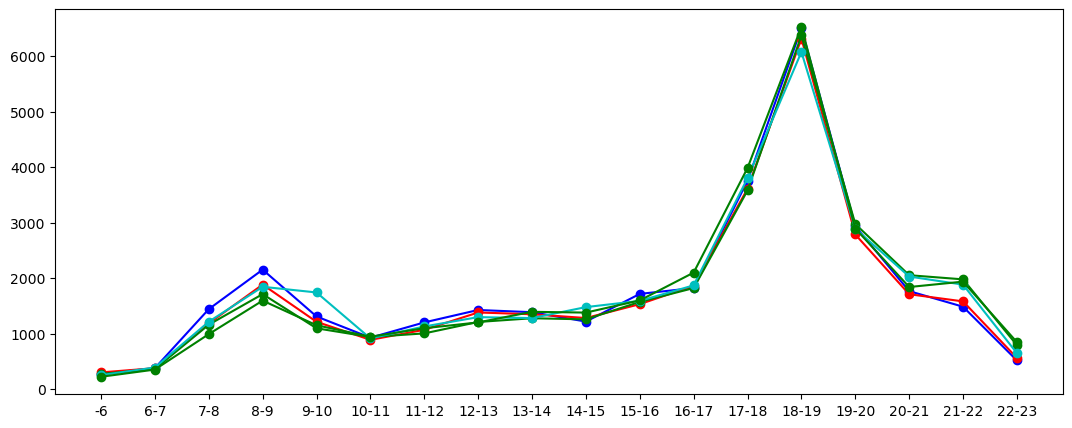

In [229]:
x = df.columns[1:-1]
y = df.values.tolist()[3][1:-1]

plt.figure(figsize=(13,5))
plt.plot(x, y, marker='o', color='b')
plt.plot(x, df.values.tolist()[4][1:-1], marker='o', color='r')
plt.plot(x, df.values.tolist()[5][1:-1], marker='o', color='g')
plt.plot(x, df.values.tolist()[6][1:-1], marker='o', color='c')
plt.plot(x, df.values.tolist()[7][1:-1], marker='o', color='g')

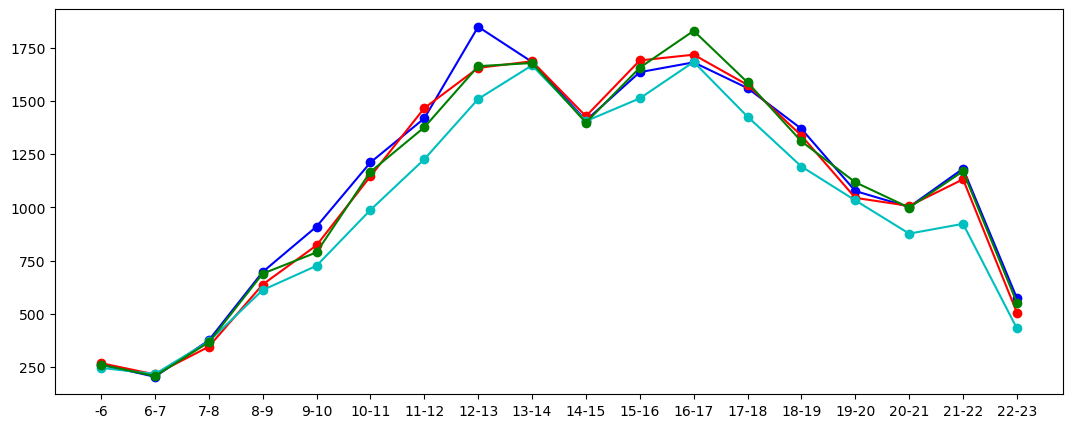

In [237]:
x = df.columns[1:-1]
y = df.values.tolist()[36][1:-1]

plt.figure(figsize=(13,5))
plt.plot(x, y, marker='o', color='b')

plt.plot(x, df.values.tolist()[22][1:-1], marker='o', color='r')
plt.plot(x, df.values.tolist()[15][1:-1], marker='o', color='c')
plt.plot(x, df.values.tolist()[29][1:-1], marker='o', color='g')